In [1]:
import pandas as pd 
from pandas_datareader import data as pdr 
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [3]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick= 'DIABLOI10.MX'
ipc = pdr.get_data_yahoo(tick,start = startdate,end = enddate)

In [4]:
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,12.50,12.38,12.50,12.41,5642,12.41
2019-03-21,12.43,12.30,12.41,12.43,24787,12.43
2019-03-22,12.75,12.50,12.63,12.75,5477,12.75
2019-03-25,12.75,12.38,12.75,12.64,2565,12.64
2019-03-26,12.64,12.60,12.60,12.61,2390,12.61


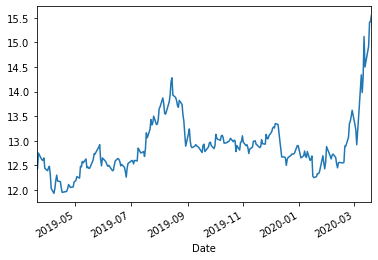

In [5]:
%matplotlib inline 
ipc.Close.plot()

In [6]:
def MA(df,n):
    MA = pd.Series(pd.Series.rolling(df['Close'],n).mean(), name= 'MA_' + str(n))
    df=df.join(MA)
    return df

ma_30 = MA(ipc,30)
ma_60 = MA(ma_30,60)

In [7]:
ma_60.head()

,High,Low,Open,Close,Volume,Adj Close,MA_30,MA_60
Date,,,,,,,,
2019-03-20,12.50,12.38,12.50,12.41,5642,12.41,NaN,NaN
2019-03-21,12.43,12.30,12.41,12.43,24787,12.43,NaN,NaN
2019-03-22,12.75,12.50,12.63,12.75,5477,12.75,NaN,NaN
2019-03-25,12.75,12.38,12.75,12.64,2565,12.64,NaN,NaN
2019-03-26,12.64,12.60,12.60,12.61,2390,12.61,NaN,NaN


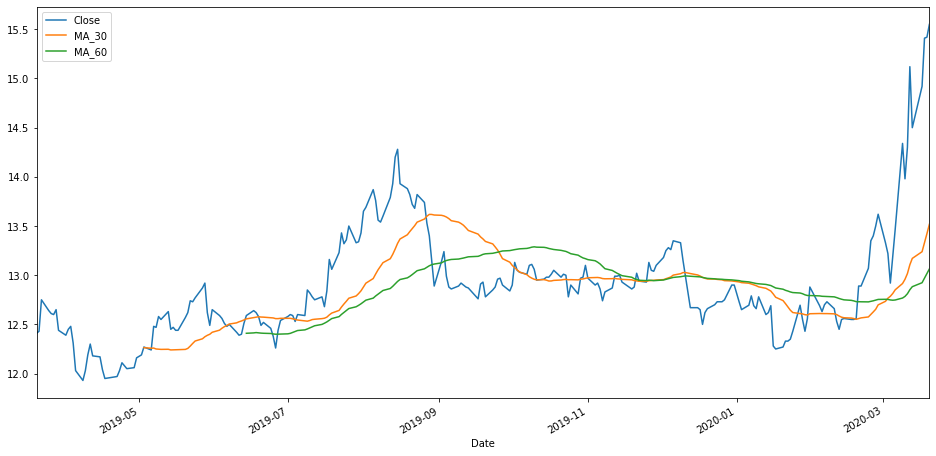

In [8]:
df=ma_60[['Close','MA_30','MA_60']]
df.plot(figsize =(16,8)) 

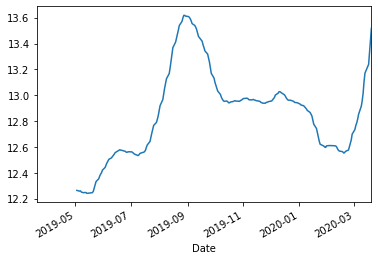

In [9]:
df.MA_30.plot()

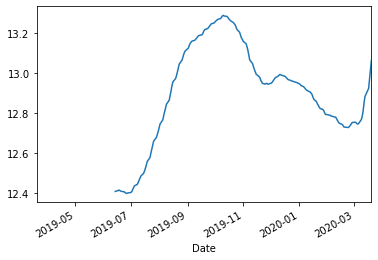

In [10]:
df.MA_60.plot()

In [11]:
df

,Close,MA_30,MA_60
Date,,,
2019-03-20,12.41,NaN,NaN
2019-03-21,12.43,NaN,NaN
2019-03-22,12.75,NaN,NaN
2019-03-25,12.64,NaN,NaN
2019-03-26,12.61,NaN,NaN
2019-03-27,12.60,NaN,NaN
2019-03-28,12.65,NaN,NaN
2019-03-29,12.44,NaN,NaN
2019-04-01,12.39,NaN,NaN


In [13]:
df.loc[df['MA_30'] < df['MA_60'] , 'Digito'] = -1
df.loc[df['MA_30'] > df['MA_60'] , 'Digito'] = 1


df.loc[df['MA_30'] < df['MA_60'] , 'Comportamiento'] = 'Media corta es menor que media larga'
df.loc[df['MA_30'] > df['MA_60'] , 'Comportamiento'] = 'Media corta es mayor que media larga'

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
df.Digito.diff()

Date
2019-03-20    NaN
2019-03-21    NaN
2019-03-22    NaN
2019-03-25    NaN
2019-03-26    NaN
2019-03-27    NaN
2019-03-28    NaN
2019-03-29    NaN
2019-04-01    NaN
2019-04-02    NaN
2019-04-03    NaN
2019-04-04    NaN
2019-04-05    NaN
2019-04-08    NaN
2019-04-09    NaN
2019-04-10    NaN
2019-04-11    NaN
2019-04-12    NaN
2019-04-15    NaN
2019-04-16    NaN
2019-04-17    NaN
2019-04-22    NaN
2019-04-23    NaN
2019-04-24    NaN
2019-04-25    NaN
2019-04-26    NaN
2019-04-29    NaN
2019-04-30    NaN
2019-05-02    NaN
2019-05-03    NaN
2019-05-06    NaN
2019-05-07    NaN
2019-05-08    NaN
2019-05-09    NaN
2019-05-10    NaN
2019-05-13    NaN
2019-05-14    NaN
2019-05-15    NaN
2019-05-16    NaN
2019-05-17    NaN
2019-05-20    NaN
2019-05-21    NaN
2019-05-22    NaN
2019-05-23    NaN
2019-05-24    NaN
2019-05-27    NaN
2019-05-28    NaN
2019-05-29    NaN
2019-05-30    NaN
2019-05-31    NaN
2019-06-03    NaN
2019-06-04    NaN
2019-06-05    NaN
2019-06-06    NaN
2019-06-07    NaN
2019-

In [16]:
df.loc[df['MA_30'] < df['MA_60'] , 'Restadigito'] = df.Digito.diff()
df.loc[df['MA_30'] > df['MA_60'] , 'Restadigito'] = df.Digito.diff()

In [17]:
df.loc[df['Restadigito'] == 2 , 'Estrategia'] = 'Golden Cross'
df.loc[df['Restadigito'] == -2 , 'Estrategia'] = 'Death Cross'

df.loc[df['Restadigito'] == 2 , 'Recomendacion'] = 'Comprar'
df.loc[df['Restadigito'] == -2 , 'Recomendacion'] = 'Vender'

df["MA_30"] = df["MA_30"].fillna("-")
df["MA_60"] = df["MA_60"].fillna("-")
df["Digito"] = df["Digito"].fillna("-")
df["Comportamiento"] = df["Comportamiento"].fillna("-")
df["Restadigito"] = df["Restadigito"].fillna("-")
df["Estrategia"] = df["Estrategia"].fillna("-")
df["Recomendacion"] = df["Recomendacion"].fillna("-")

In [18]:
df[['Close','Estrategia', 'Recomendacion']]

,Close,Estrategia,Recomendacion
Date,,,
2019-03-20,12.410,-,-
2019-03-21,12.430,-,-
2019-03-22,12.750,-,-
2019-03-25,12.640,-,-
2019-03-26,12.610,-,-
2019-03-27,12.600,-,-
2019-03-28,12.650,-,-
2019-03-29,12.440,-,-
2019-04-01,12.390,-,-
